# Fourier Transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

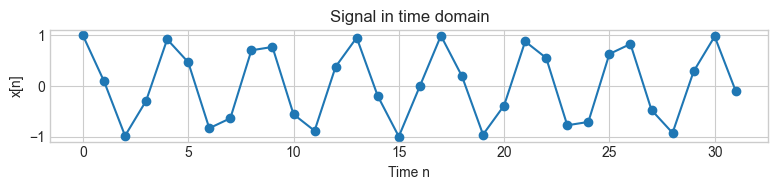

In [ ]:
N = 32  # length of the signal x
k0 = 7.5  # frequency of the complex exponential
x = np.cos(2 * np.pi * k0 / N * np.arange(N))

fig, ax = plt.subplots(1, 1, figsize=(8, 2))
ax.plot(np.arange(0, N), x, "o-")
ax.set_title("Signal in time domain")
ax.set_xlabel("Time n")
ax.set_ylabel("x[n]")

plt.tight_layout()
plt.show()

## Discrete Fourier Transform DFT

In the signal processing literature the DFT is expressed as: 

$$
X[k] = \sum_{n=0}^{N-1} x[n]  e^{-j2 \pi kn/N} \hspace{1cm} k=0,1,2,...,N-1
$$

Where:

$x[n]$ is the discrete input signal at time [sample] $n$

$n$ is the sample number (integer)

$X[k]$ is the $k$ th spectral sample

$w_k = k\Omega$ is the  $k$ th frequency sample (rad/sec)

$\Omega = \dfrac{2\pi}{NT}$

$f_s = \dfrac{1}{T}$ 

$N$ is the number of samples in both time and frequency

$e^{-j2 \pi kn/N}$ is the complex exponential

$j = \sqrt{-1}$     or    $j = -1^2$ 

$e = \lim_{n\to\inf} (1 + \dfrac{1}{n})^n = 2.71828182845905...$

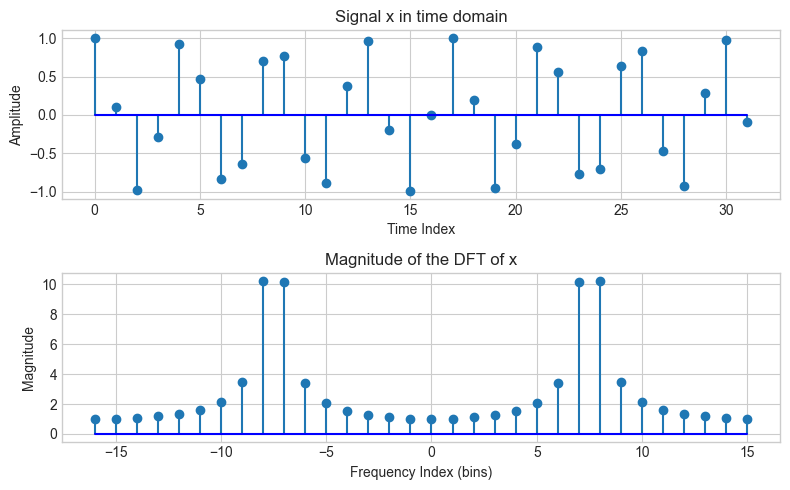

In [2]:
# "Manually" compute the DFT of a signal x

nv = np.arange(-N/2, N/2)   # time index
kv = np.arange(-N/2, N/2)   # frequency index

X = np.array([])    # placeholder for the DFT of x
for k in kv:
    s = np.exp(1j * 2 * np.pi * k / N * nv)
    X = np.append(X, sum(x * np.conjugate(s)))


fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.title('DFT of a signal x')
ax[0].stem(np.arange(0, N), x, basefmt='b-')
ax[0].set_title('Signal x in time domain')
ax[0].set_xlabel('Time Index')
ax[0].set_ylabel('Amplitude')

ax[1].stem(kv, np.abs(X), basefmt='b-')
ax[1].set_title('Magnitude of the DFT of x')
ax[1].set_xlabel('Frequency Index (bins)')
ax[1].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

## Inverse Discrete Fourier Transform IDFT  

To recover the original signal from the DFT we use the inverse DFT (IDFT) which is expressed as:

$$
x[n] = \frac{1}{N}\sum_{k=0}^{N-1} X[k]  e^{j2 \pi nk/N} \hspace{1cm} n=0,1,2,...,N-1
$$

Where:
x[n] : discrete input signal at time [sample] n

/usr/local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


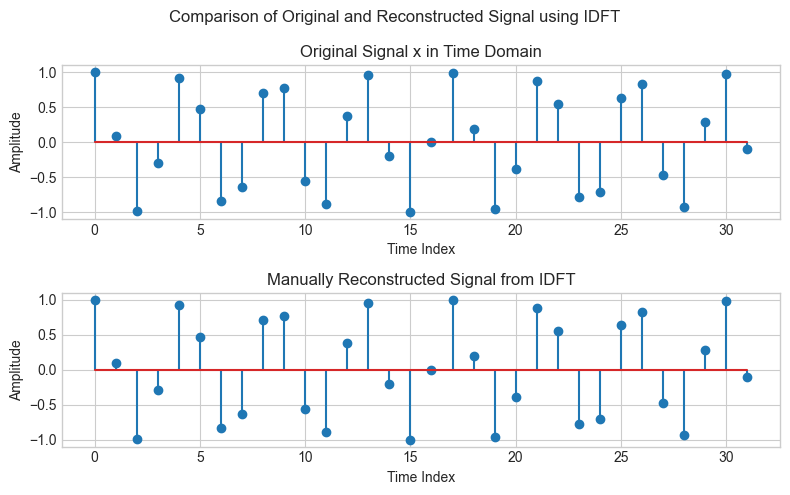

In [3]:
x_reconstructed = np.array([])
for n in nv:
    s = np.exp(1j * 2 * np.pi * n / N * kv)
    x_reconstructed = np.append(x_reconstructed, 1.0 / N * sum(X * s))

# Plotting for comparison
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.suptitle('Comparison of Original and Reconstructed Signal using IDFT')

ax[0].set_title('Original Signal x in Time Domain')
ax[0].stem(np.arange(0, N), x, label='x[n]')
ax[0].set_xlabel('Time Index')
ax[0].set_ylabel('Amplitude')

ax[1].set_title('Manually Reconstructed Signal from IDFT')
ax[1].stem(np.arange(0, N), x_reconstructed, label='idft(X[k])')
ax[1].set_xlabel('Time Index')
ax[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

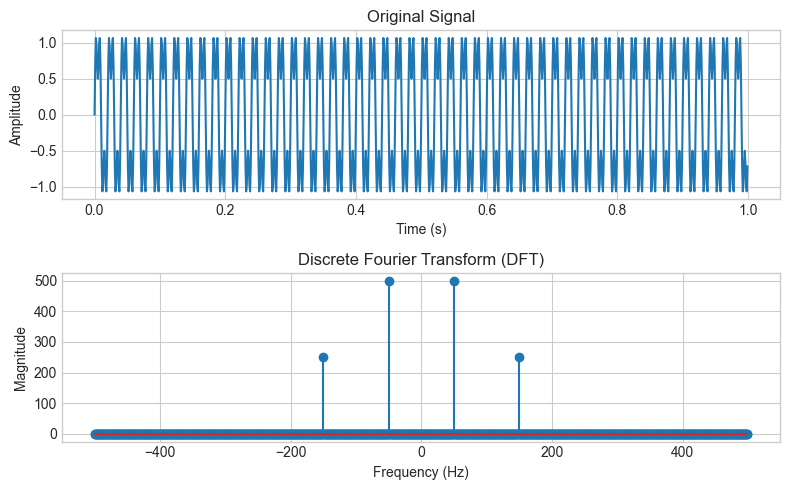

In [4]:
# Function to compute DFT
def compute_dft(signal):
    N = len(signal)
    X = np.zeros(N, dtype=np.complex128)

    for k in range(N):
        X[k] = np.sum(signal * np.exp(-1j * 2 * np.pi * k * np.arange(N) / N))

    return X

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1/fs   # Sampling period
duration = 1  # Signal duration in seconds
t = np.arange(0, duration, T)  # Time array

# Create a signal composed of two sinusoids
frequencies = [50, 150]
signal = np.sin(2 * np.pi * frequencies[0] * t) + 0.5 * np.sin(2 * np.pi * frequencies[1] * t)

# Compute DFT of the signal
dft_result = compute_dft(signal)

plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
frequencies_dft = np.fft.fftfreq(len(dft_result), T)
plt.stem(frequencies_dft, np.abs(dft_result))
plt.title('Discrete Fourier Transform (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()